Import libraries

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import set_config
from sklearn.impute import SimpleImputer
set_config(display='diagram')
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

Load the dataset

In [2]:
df = pd.read_csv('/content/sobar-72.csv')
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [3]:
#Explore the data (check dtypes, number of rows and columns, and check for null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

Identify and address any duplicate values

In [4]:
#Check for duplicates
df.duplicated().any()

False

In [5]:
df.duplicated().sum()

0

Identify missing values

In [6]:
#Identify missing values
df.isna().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

Identify and Inconsistencies with Data

In [7]:
dtypes = df.dtypes
int_cols = dtypes[dtypes=='int64'].index
int_cols

Index(['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygine',
       'intention_aggregation', 'intention_commitment', 'attitude_consistency',
       'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
       'perception_vulnerability', 'perception_severity',
       'motivation_strength', 'motivation_willingness',
       'socialSupport_emotionality', 'socialSupport_appreciation',
       'socialSupport_instrumental', 'empowerment_knowledge',
       'empowerment_abilities', 'empowerment_desires', 'ca_cervix'],
      dtype='object')

In [8]:
for col in int_cols:
  print(f"- Column= {col}")
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column= behavior_sexualRisk
10    64
8      2
7      2
9      2
2      1
6      1
Name: behavior_sexualRisk, dtype: int64



- Column= behavior_eating
15    27
12    11
11    10
13     8
14     6
10     4
9      3
8      2
3      1
Name: behavior_eating, dtype: int64



- Column= behavior_personalHygine
11    13
15    13
12     7
14     7
10     6
7      6
9      6
8      5
13     5
5      2
3      1
4      1
Name: behavior_personalHygine, dtype: int64



- Column= intention_aggregation
10    38
6     12
2      7
8      4
9      4
4      2
7      2
5      2
3      1
Name: intention_aggregation, dtype: int64



- Column= intention_commitment
15    40
14     8
11     8
10     6
13     3
7      2
9      2
12     2
6      1
Name: intention_commitment, dtype: int64



- Column= attitude_consistency
8     21
6     18
7     15
10     6
9      5
5      5
2      1
4      1
Name: attitude_consistency, dtype: int64



- Column= attitude_spontaneity
10    32
8     22
6      7
9      5
7      4
5

There are no inconsistencies 

Exploring the Data

In [9]:
#Check the stats for the numerical columns
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


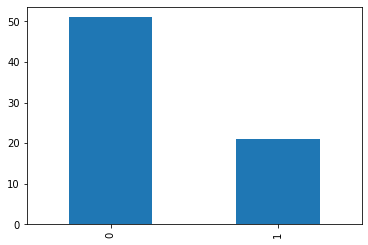

In [10]:
#Check univariate distributions and explore categorical variables
df['ca_cervix'].value_counts().plot(kind = 'bar');

This graph represents with 0 1=has cervical cancer, 0=no cervical cancer.

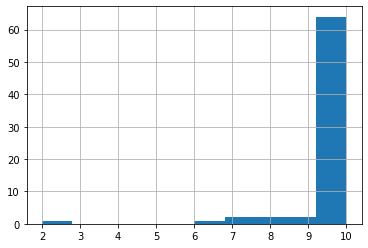

In [11]:
df['behavior_sexualRisk'].hist();

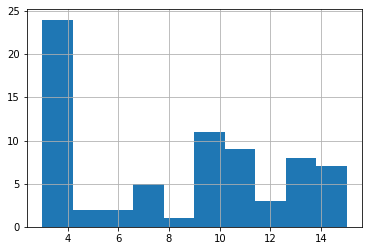

In [12]:
df['socialSupport_emotionality'].hist();

Explore the relationships between  variables with bivariate visuals

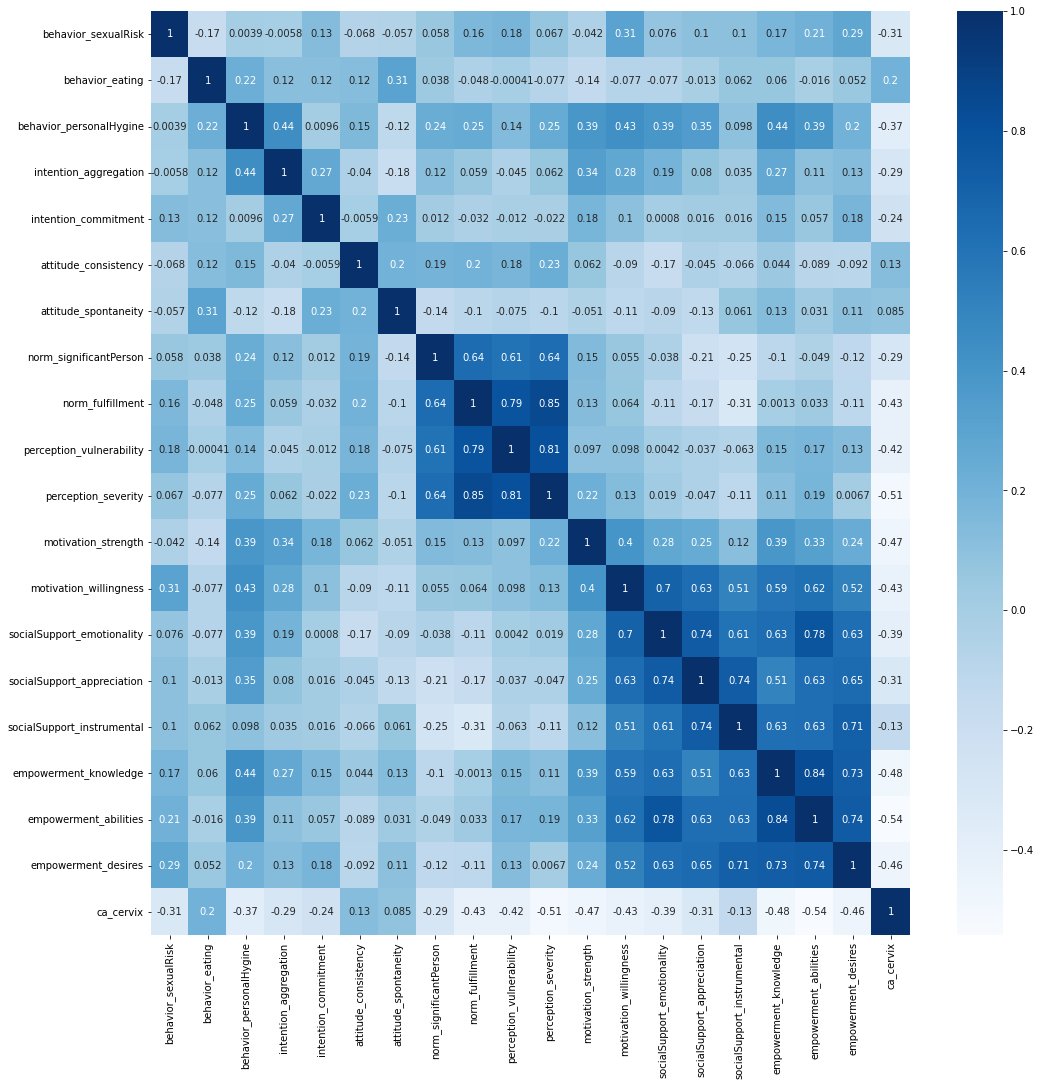

In [13]:
corr = df.corr()
plt.figure(figsize=(17,17))
sns.heatmap(corr, cmap='Blues', annot=True)

There are some strong correlation between perception_severity - norm_fulfillment, perception_vulnerability - norm_fulfillment, perception_severity - perception_vulnerability, empowerment_abilities - empowerment - knowledge, empowerment_desires -empowerment abilities. 

It looks like people with higher levels* of Social support emotionality are more likely to not get a positive cervix cancer diagnose. The same applies to Social support appreciation.

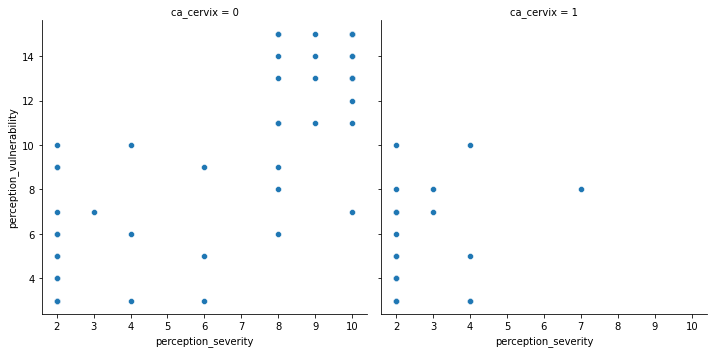

In [14]:
sns.relplot(
    x='perception_severity', 
    y='perception_vulnerability', 
    data= df, 
    kind='scatter', 
    col='ca_cervix');

In this graph we can observe that people diagnosed with cervix cancer are more likely to have lower indicator in perception vulnerability and perceptions severity.

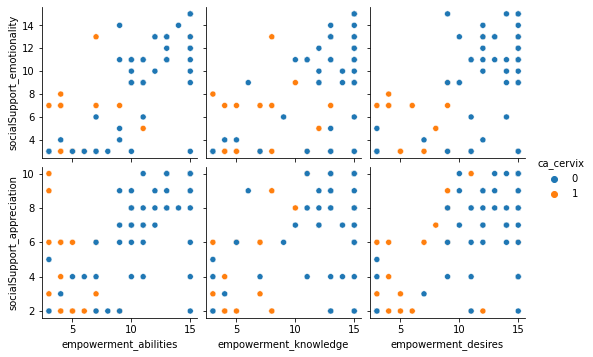

In [15]:
#This is a neat way to get a quick scatterplot between each of your features and the target
sns.pairplot(df,
             x_vars = ['empowerment_abilities', 'empowerment_knowledge', 'empowerment_desires'],
             y_vars = ['socialSupport_emotionality', 'socialSupport_appreciation'],
             hue = 'ca_cervix');

In this graph we are not only looking at the social support appreciation and social support emotionality but also empowerment abilities, empowerment knowledge and empowerment desires. There is a tendency in here where people with highest indicators in those variables are more likely to not be diagnosed with cervical cancer. By contrast, people with lower indicator in these variables are more likely to be diagnosed with Cervical Cancer.

1. Visual:
This graph shows the strong correlation between empowerment abilities, knowledge and desires with negative cancer diagnosis.


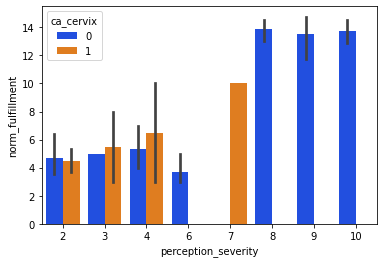

In [16]:
sns.barplot(
    x='perception_severity', 
    y='norm_fulfillment', 
    data=df, 
    palette='bright', 
    hue='ca_cervix');

2. Visual:
This graph shows a very interesting result between the perception severity and norm fulfillment in the diagnosis of Cervix Cancer. People with higher indicator in Norm fulfillment and Perception severity are more likely to not be diagnosed with Cervical Cancer.

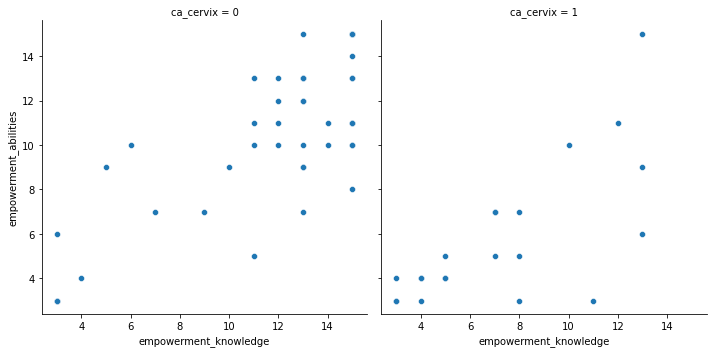

In [17]:
sns.relplot(
    x='empowerment_knowledge', 
    y='empowerment_abilities', 
    data= df, 
    kind='scatter', 
    col='ca_cervix');

In this graph we can compare people's empowerment abilities and knowledge with being diagnosed with cervical Cancer. Even though is not as strong as the other features analyzed before we can still appreciate a tendency in how people with highest indicators in Empowerment abilities and knowledge are more likely to not being diagnosed with Cervical cancer.

In [18]:
#Identify target vector and features matrix
X = df.drop(columns = 'ca_cervix')
y = df['ca_cervix']

In [19]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [20]:
X.shape

(72, 19)

In [21]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)



PCA for visualization

In [22]:
# Instantiate, fit & transform data using PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_df)



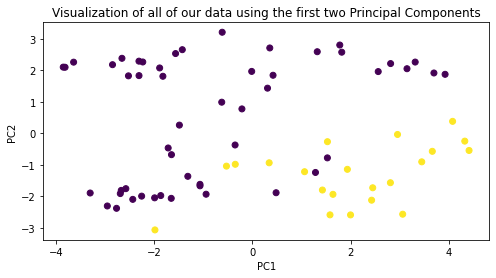

In [23]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');


Models

In [70]:
# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01],
          'class_weight': [None, 'balanced']}

In [26]:
# logistic regression 
log_reg = LogisticRegression(solver = 'liblinear')

# grid search to find best hyperparameters
gs = GridSearchCV(log_reg, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [27]:
gs.best_estimator_

LogisticRegression(C=0.01, solver='liblinear')

In [28]:
# Accuracy:
print('Training accuracy:', gs.score(X_train, y_train))
print('Test accuracy:', gs.score(X_test, y_test))

Training accuracy: 0.8703703703703703
Test accuracy: 0.8888888888888888


In [29]:
#Predictions
preds = gs.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


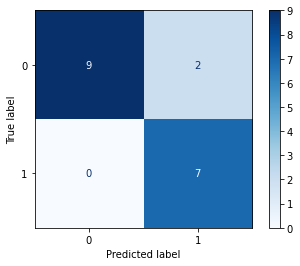

In [30]:
plot_confusion_matrix(gs, X_test, y_test,
                      cmap = 'Blues',
                      values_format = 'd');

In [31]:
# Sensitivity:

# Save confusion matrix:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

sensitivity = tp/ (tp + fn)

print('Sensitivity:', sensitivity)

Sensitivity: 1.0


In [32]:
# Specificity:
specificity = tn / (tn + fp)

print('Specificity:', specificity)

Specificity: 0.8181818181818182


In [33]:
# AUC ROC
print('AUC ROC:', roc_auc_score(y_test, gs.predict_proba(X_test)[:,1]))

AUC ROC: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


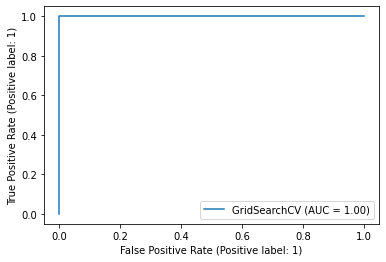

In [34]:
# Plot ROC curve
plot_roc_curve(gs, X_test, y_test);

Desicion tree

In [35]:
## Evaluation function
def evaluate_classification(model,X_train,X_test,y_train,y_test):
    """Uses model.score to display the accuracy scores for training and test splits"""
    print(f"Training Accuracy: {model.score(X_train, y_train):.3f}")
    print(f"Test Accuracy: {model.score(X_test, y_test):.3f}")

In [36]:
## Make, fit, and evaluate Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
evaluate_classification(tree_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Test Accuracy: 0.833


In [37]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [38]:
paramsdt = {'max_depth': [None],
            'min_samples_leaf': [1, 5, 15],
            'min_samples_split': [2, 10, 15]}

In [39]:
# grid search to find best hyperparameters
gsclf = GridSearchCV(tree_clf, paramsdt)
gsclf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 5, 15],
                         'min_samples_split': [2, 10, 15]})

In [40]:
# here are the best hyperparameters based on the ones I tried
gsclf.best_estimator_

DecisionTreeClassifier(min_samples_split=10, random_state=42)

In [41]:
# Accuracy:
print('Training accuracy:', gsclf.score(X_train, y_train))
print('Test accuracy:', gsclf.score(X_test, y_test))

Training accuracy: 0.9629629629629629
Test accuracy: 0.8333333333333334


In [42]:
# save predictions
predclf = gsclf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


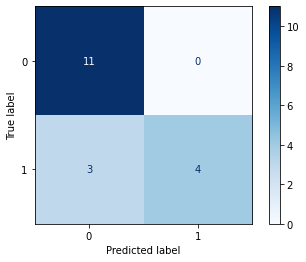

In [43]:
plot_confusion_matrix(gsclf, X_test, y_test,
                      cmap = 'Blues',
                      values_format = 'd');

In [44]:
# Sensitivity:

# Save confusion matrix:
tn, fp, fn, tp = confusion_matrix(y_test, predclf).ravel()

sensitivity = tp/ (tp + fn)

print('Sensitivity:', sensitivity)

Sensitivity: 0.5714285714285714


In [45]:
# Specificity:
specificity = tn / (tn + fp)

print('Specificity:', specificity)

Specificity: 1.0


In [46]:
# AUC ROC
print('AUC ROC:', roc_auc_score(y_test, gsclf.predict_proba(X_test)[:,1]))

AUC ROC: 0.8896103896103895


Random Classification

In [47]:
## Make, fit, and evaluate RandomClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

evaluate_classification(rf_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Test Accuracy: 0.889


In [48]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [49]:
paramsrf = {'max_depth': [None],
            'min_samples_leaf': [1, 5, 15],
            'min_samples_split': [2, 10, 15]}

In [50]:
# grid search to find best hyperparameters
gsrf = GridSearchCV(rf_clf, paramsrf)
gsrf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 5, 15],
                         'min_samples_split': [2, 10, 15]})

In [51]:
# Accuracy:
print('Training accuracy:', gsrf.score(X_train, y_train))
print('Test accuracy:', gsrf.score(X_test, y_test))

Training accuracy: 0.9629629629629629
Test accuracy: 0.8888888888888888


In [52]:
# save predictions
predrf = gsrf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


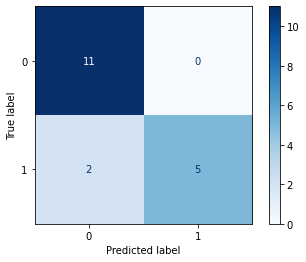

In [53]:
plot_confusion_matrix(gsrf, X_test, y_test,
                      cmap = 'Blues',
                      values_format = 'd');

In [54]:
# Sensitivity:

# Save confusion matrix:
tn, fp, fn, tp = confusion_matrix(y_test, predrf).ravel()

sensitivity = tp/ (tp + fn)

print('Sensitivity:', sensitivity)

Sensitivity: 0.7142857142857143


In [55]:
# Specificity:
specificity = tn / (tn + fp)

print('Specificity:', specificity)

Specificity: 1.0


In [56]:
# AUC ROC
print('AUC ROC:', roc_auc_score(y_test, gsrf.predict_proba(X_test)[:,1]))

AUC ROC: 0.974025974025974


KNN

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
# Looking at some hyperparameters that seem tunable
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [59]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [60]:
predictions = knn_pipe.predict(X_test)
predictions

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [61]:
# calculate classification accuracy
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.9444444444444444

In [89]:
#Define the hyperparameters you want to test
knn_params = {'kneighborsclassifier__n_neighbors': [1,5],
              'kneighborsclassifier__leaf_size': [10,30]}

In [90]:
# Instantiate the Gridsearch with the KNN pipeline and the knn_params
knn_gs = GridSearchCV(knn_pipe, knn_params)

knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'kneighborsclassifier__leaf_size': [10, 30],
                         'kneighborsclassifier__n_neighbors': [1, 5]})

In [91]:
#See which hyperparameters gave the best results
knn_gs.best_params_

{'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__n_neighbors': 1}

In [92]:
# Predict Outcome
train_preds_hyper = knn_gs.predict(X_train)
test_preds_hyper = knn_gs.predict(X_test)

In [93]:
# Evaluate default model - this is accuracy
print('Accuracy of Train set', accuracy_score(y_train, train_preds_hyper))
print('Accuracy of Test set', accuracy_score(y_test, test_preds_hyper))

Accuracy of Train set 1.0
Accuracy of Test set 0.9444444444444444


In [94]:
# Evaluate default model - this is recall
print('Recall of Train set', metrics.recall_score(y_train, train_preds_hyper))
print('Recall of Test set', metrics.recall_score(y_test, test_preds_hyper))

Recall of Train set 1.0
Recall of Test set 0.8571428571428571


In [95]:
# Evaluate default model - this is precision
print('Precision of Train set', metrics.precision_score(y_train, train_preds_hyper))
print('Precision of Test set', metrics.precision_score(y_test, test_preds_hyper))

Precision of Train set 1.0
Precision of Test set 1.0


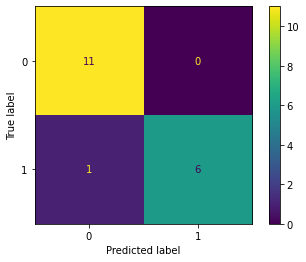

In [96]:
#Recreate the confusion matrix above, but with the values normalized along the 'true' axis.
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_hyper);

Conclusion: After examinating the models used and analized the accuracy, precision and other metrics levels on models it looks like models run better on the train but do not have the same resuls in the testing. Nevertheless Logistic regression  has better metrics results. Recomendations for better results: Over or under sample the dataset to try to balance the target more. I would also recommend feature selection to reduces overfitting, less redundant data would improve accuracy.